In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd

# Load the datasets
X_train = pd.read_csv('/content/drive/MyDrive/Stats 5243 Project I/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Stats 5243 Project I/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Stats 5243 Project I/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Stats 5243 Project I/y_test.csv')

X_train.head(), y_train.head(), X_test.head(), y_test.head()

if isinstance(y_train, pd.DataFrame):
    y_train = y_train['damage_grade']
if isinstance(y_test, pd.DataFrame):
    y_test = y_test['damage_grade']

y_train = y_train.squeeze()
y_test = y_test.squeeze()


0        3
1        2
2        2
3        2
4        3
        ..
52116    2
52117    2
52118    2
52119    2
52120    1
Name: damage_grade, Length: 52121, dtype: int64

In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')


X_train shape: (208480, 69)
y_train shape: (208480,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.44991462, 0.4596228 , 0.44571286, 0.50528578, 0.49651772,
       0.50703171, 0.51555035, 0.5225341 , 0.52107596, 0.52888471,
       0.52813645, 0.53036204, 0.53385392, 0.53617544, 0.5371923 ,
       0.53974406, 0.54003185, 0.54097197, 0.54212314, 0.54252605])

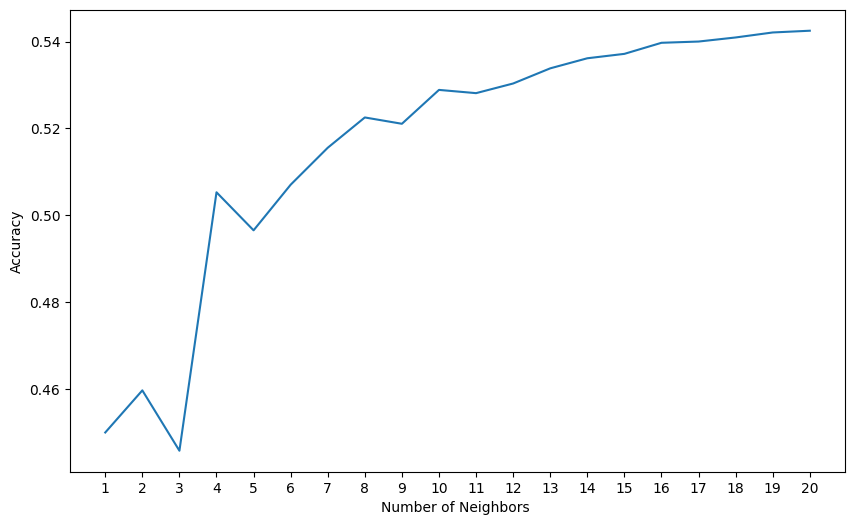

In [16]:
import matplotlib.pyplot as plt

# Plot the accuracy
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# ERROR
# Tune hyperparameter
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [18,19,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

In [18]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [19]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [21]:
#Model Evaluation
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv =5)

print('Model accuracy: ',np.mean(scores))

Training set accuracy:  0.5835427858787414
Test set accuracy:  0.5425260451641373
[[    6  4493   526]
 [   19 26396  3237]
 [   15 15554  1875]]
              precision    recall  f1-score   support

           1       0.15      0.00      0.00      5025
           2       0.57      0.89      0.69     29652
           3       0.33      0.11      0.16     17444

    accuracy                           0.54     52121
   macro avg       0.35      0.33      0.29     52121
weighted avg       0.45      0.54      0.45     52121

Model accuracy:  0.544800460475825


In [22]:
# Calculate the weighted F1 score
weighted_f1 = f1_score(y_test, y_knn, average='weighted')

print(f'Weighted F1 Score: {weighted_f1}')

Weighted F1 Score: 0.4492897862396231


In [23]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are already defined from the KNN model predictions
# Calculate accuracy
accuracy = accuracy_score(y_test, y_knn)

accuracy

0.5425260451641373

In [24]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for KNN model
conf_matrix_knn = confusion_matrix(y_test, y_knn)

conf_matrix_knn

array([[    6,  4493,   526],
       [   19, 26396,  3237],
       [   15, 15554,  1875]])